**KNN**

According to this algorithm, which is used in classification, feature extraction during classification is used to look at the closeness of the new individual to be categorized to k of the previous individuals.
For example, you want to classify a new element for k = 3. in this case the nearest 3 of the old classified elements are taken. If these elements are included in the class, the new element is also included in that class. The euclide distance can be used in the distance calculation.

# Project - Classify Type of Patient from the biomechanical features of orthopedic patients.

# Install the necessary libraries


In [12]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

# import data 2C_weka.csv for 2 Class Classifcation.


In [13]:
df = pd.read_csv("2Classdata.csv")

# Explore the data set.Get necessary information about the data.

Look at the head and tail of dataset.
Find the missing value.
Look at the unique values of class values.
Look at the distribution of class values and other attributes.
Get the datatype information about the dataset
Plot the distribution of different classes for pelvic_radius and sacral_slope for visualization.

In [14]:
print(df.head())
print(df.tail())

   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
0         63.027818            22.552586              39.609117     40.475232   
1         39.056951            10.060991              25.015378     28.995960   
2         68.832021            22.218482              50.092194     46.613539   
3         69.297008            24.652878              44.311238     44.644130   
4         49.712859             9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis     class  
0      98.672917                 -0.254400  Abnormal  
1     114.405425                  4.564259  Abnormal  
2     105.985135                 -3.530317  Abnormal  
3     101.868495                 11.211523  Abnormal  
4     108.168725                  7.918501  Abnormal  
     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496   

In [15]:
print(df.isna().sum())

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [16]:
df.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Abnormal,210,210,210,210,210,210
Normal,100,100,100,100,100,100


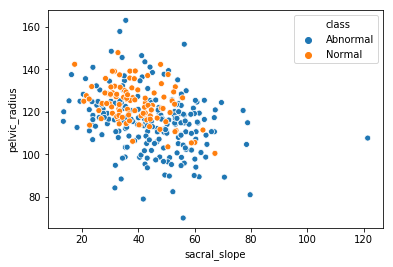

In [17]:
import seaborn as sns
sns.scatterplot(x=df['sacral_slope'],y=df['pelvic_radius'],hue=df['class'])

# Encode the Class variable to integer.

In [18]:
a=df['class']

In [21]:
a= pd.get_dummies(a, drop_first=True)

In [23]:
df['class']=a
print(df)

     pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
5           40.250200            13.921907              25.124950   
6           53.432928            15.864336              37.165934   
7           45.366754            10.755611              29.038349   
8           43.790190            13.533753              42.690814   
9           36.686353             5.010884              41.948751   
10          49.706610            13.040974              31.334500   
11          31.232387            17.715819              15.500000   
12          48.915551            19.964556              40.263794   
13          53.572170            2

# Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [24]:
X = df.drop(labels= 'class' , axis = 1)

In [25]:
Y = df[['class']]

# Normalize your Data (X) to get values between 0 to 1.

In [26]:
x=X.values
scale=MinMaxScaler()
x_norm=scale.fit_transform(x)

In [27]:
X=pd.DataFrame(x_norm)
X.columns=['pelvic_incidence','pelvic_tilt numeric','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']

# Split the dat as train and test with a ratio of 70:30.

In [28]:
test_size = 0.30 
seed = 7 

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Build the KNN model using Train Dataset and predict the class on test dataset.

In [30]:
knn = KNeighborsClassifier(n_neighbors= 7)

In [31]:
knn.fit(X_train, Y_train)

/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

# Calculate the performance score of of your classification on test dataset.
Hint- You can use knn.score( ) function.

In [32]:
knn.score(X_test, Y_test)

0.8172043010752689

# What is the best K value for your classifcation?
#Find at which k value you get the best score.

In [33]:
accuracy=[]

In [34]:
for k in np.arange(1,21,2):
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,Y_train)
    ypred = knn.predict(X_test)
    accuracy.append(accuracy_score(Y_test, ypred))
print(accuracy)

[0.7741935483870968, 0.7526881720430108, 0.7634408602150538, 0.8172043010752689, 0.8064516129032258, 0.8172043010752689, 0.8172043010752689, 0.8064516129032258, 0.7956989247311828, 0.7956989247311828]


/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/bharath/anaconda3/lib/python3.7/site-packages

In [36]:
optimal=pd.DataFrame({'K':np.arange(1,21,2), 'Accuracy':accuracy})
print('so the optimal k value is ')
print(optimal.loc[optimal['Accuracy'].idxmax()])

so the optimal k value is 
K           7.000000
Accuracy    0.817204
Name: 3, dtype: float64


# import data 3C_weka.csv for 3 Class Classifcation and repeat all the steps which are given above.

In [37]:
df1 = pd.read_csv("3Classdata.csv")

In [38]:
print(df1.head())
print(df1.tail())

   pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  
     pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
305         47.903565    13.616688              36.000000     34.286877   
306         53.936748    20.721496              29.220534     33.215251   
307         61.446

In [39]:
print(df1.isna().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [40]:
df1.groupby(['class']).count()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
class,,,,,,
Hernia,60,60,60,60,60,60
Normal,100,100,100,100,100,100
Spondylolisthesis,150,150,150,150,150,150


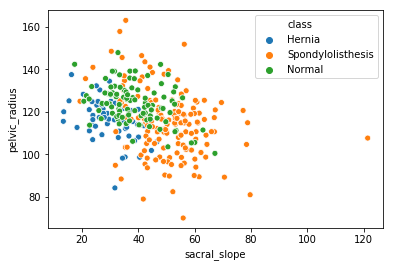

In [41]:
import seaborn as sns
sns.scatterplot(x=df1['sacral_slope'],y=df1['pelvic_radius'],hue=df1['class'])

In [42]:
mask = df1.dtypes==object
cols = df1.columns[mask].tolist()
le = LabelEncoder()
df1[cols] = df1[cols].apply(lambda col: le.fit_transform(col))

In [43]:
X1 = df1.drop(labels= 'class' , axis = 1)
Y1 = df1[['class']]

In [44]:
x1=X1.values
scale=MinMaxScaler()
x1_norm=scale.fit_transform(x1)
X1=pd.DataFrame(x1_norm)
X1.columns=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis']

In [45]:
test_size = 0.30 
seed = 9 
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=test_size, random_state=seed)
knn1 = KNeighborsClassifier(n_neighbors= 39)
knn1.fit(X1_train, Y1_train)
knn1.score(X1_test, Y1_test)

/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


0.8064516129032258

In [46]:
acc=[]
for k in np.arange(1,40,2):
    knn = KNeighborsClassifier(k)
    knn.fit(X1_train,Y1_train)
    y1pred = knn.predict(X1_test)
    acc.append(accuracy_score(Y1_test, y1pred))
print(acc)
optimal=pd.DataFrame({'K':np.arange(1,40,2), 'Accuracy':acc})
print('so the optimal k value is ')
print(optimal.loc[optimal['Accuracy'].idxmax()])

[0.7634408602150538, 0.7419354838709677, 0.7096774193548387, 0.7311827956989247, 0.7419354838709677, 0.7849462365591398, 0.7956989247311828, 0.7741935483870968, 0.7634408602150538, 0.7526881720430108, 0.7526881720430108, 0.7419354838709677, 0.7419354838709677, 0.7526881720430108, 0.7849462365591398, 0.7741935483870968, 0.7849462365591398, 0.7956989247311828, 0.7741935483870968, 0.8064516129032258]
so the optimal k value is 
K           39.000000
Accuracy     0.806452
Name: 19, dtype: float64


/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.
/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 